## Importing dependencies and libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import cv2
import os

In [2]:
img_array = cv2.imread("Train_Dataset\Closed_Eyes\s0001_01136_0_1_0_2_0_01.png", cv2.IMREAD_GRAYSCALE)

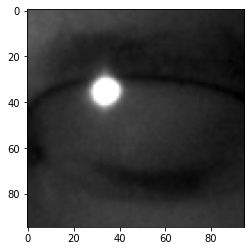

In [3]:
plt.imshow(img_array, cmap='gray')

In [4]:
img_array.shape

(95, 95)

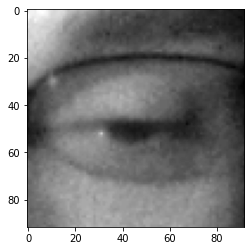

In [5]:
DataDirectory = "Train_Dataset/"
Classes = ["Open_Eyes", "Closed_Eyes"]
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

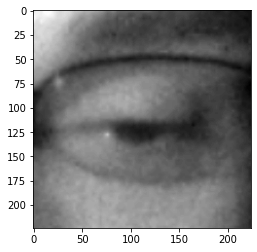

In [6]:
img_size = 224

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

## Reading all the images and converting them into an array and labels

In [7]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


In [8]:
create_training_data()

In [9]:
print(len(training_data))

33151


## Random Shuffling of the data


In [10]:
import random

random.shuffle(training_data)

In [11]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)

In [12]:
X.shape

(33151, 224, 224, 1)

## Normalizing the data

In [13]:
X = X/255.0

In [14]:
Y = np.array(y)
Y

array([0, 1, 1, ..., 0, 0, 0])

In [27]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

MemoryError: 

In [28]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
Y = pickle.load(pickle_in)

EOFError: Ran out of input

## Deep Learning model for training - Transfer Learning Model

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
model = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 11s 1us/step


In [26]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## Transfer Learning

In [29]:
base_input = model.layers[0].input

In [31]:
base_output = model.layers[
    -4].output

In [32]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation("sigmoid")(final_output)

In [33]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [35]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

## Settings for binary classification(open/closed)

In [38]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
new_model.fit(X,Y, epochs=1, validation_split=0.1)

MemoryError: Unable to allocate 5.58 GiB for an array with shape (29835, 224, 224, 1) and data type float32